# Proyek Analisis Data: [[E-Commerce Public Dataset](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing) ([Sumber](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce))]
- **Nama:** Zainul Muhaimin
- **Email:** zainulm.work@gmail.com
- **ID Dicoding:** [zainul-muhaimin](https://www.dicoding.com/users/zainul-muhaimin)

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang paling banyak digunakan oleh customer ketika melakukan order? (Data yang digunakan: order_payments_df)
- Berapakah persentase pesanan yang mengalami keterlambatan pengiriman? (Data yang digunakan: orders_df)
- Berapa jumlah total pendapatan yang dihasilkan dari penjualan produk pada kategori tertentu? dan 
Kategori produk apa yang memiliki total pendapatan terbanyak? (Data yang digunakan: order_items_df, product_category_name_translation dan products_df)

Data yang digunakan: order_payments_df, orders_df, order_items_df, product_category_name_translation dan products_df

## Import Semua Packages/Library yang Digunakan

In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import datetime as dt
import os

## Data Wrangling

### Gathering Data

ekstrak data dari file zip ke dalam folder "datas"

In [34]:
# ekstrak "e-commerce-public-dataset.zip" dari file zip ke dalam folder "datas"
with zipfile.ZipFile('e-commerce-public-dataset.zip', 'r') as zip_file:
    zip_file.extractall('datas/')

memuat seluruh file csv ke dalam dataframe dalam bentuk dictionary

In [35]:
# memuat seluruh file csv ke dalam dataframe dalam bentuk dictionary
datas = {}
for file_name in os.listdir('datas/'):
    if file_name.endswith('.csv'):
        key = file_name.replace('.csv', '').replace('_dataset', '').lower() + '_df'
        datas[key] = pd.read_csv(os.path.join('datas/', file_name))


# menampilkan jumlah baris dan kolom dari setiap dataframe
for key, df in datas.items():
    print(f"{key}: {df.shape}")

customers_df: (99441, 5)
geolocation_df: (1000163, 5)
orders_df: (99441, 8)
order_items_df: (112650, 7)
order_payments_df: (103886, 5)
order_reviews_df: (99224, 7)
products_df: (32951, 9)
product_category_name_translation_df: (71, 2)
sellers_df: (3095, 4)


menampilkan 5 baris pertama dari Orders data

In [36]:
datas["orders_df"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


menampilkan 5 baris pertama dari Order Payments data

In [37]:
datas["order_payments_df"].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


menampilkan 5 baris pertama dari Order Items data

In [38]:
datas["order_items_df"].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


menampilkan 5 baris pertama dari Order Reviews data

In [39]:
datas["order_reviews_df"].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


menampilkan 5 baris pertama dari Products data

In [40]:
datas["products_df"].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


menampilkan 5 baris pertama dari Product Category Translation data

In [41]:
# Product Category Translation data
datas["product_category_name_translation_df"].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


menampilkan 5 baris pertama dari Sellers data

In [42]:
datas["sellers_df"].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


menampilkan 5 baris pertama dari Customers data

In [43]:
datas["sellers_df"].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

menampilkan info pada setiap dataframe

In [44]:
# menampilkan info pada setiap dataframe
for key, df in datas.items():
    print(f"\n{key.replace("_df", "").replace("_", " ").capitalize()} Data ({key}) info:")
    print(df.info())


Customers Data (customers_df) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Geolocation Data (geolocation_df) info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Orders Data (orders_df) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status        

menampilkan data dengan nilai null/NaN pada setiap dataframe

In [45]:
# menampilkan data dengan nilai null/NaN pada setiap dataframe
for key, df in datas.items():
    print(f"\n{key.replace('_df', '').replace("_", " ").capitalize()} Data ({key}) dengan null value: \n{df.isna().sum()}")


Customers Data (customers_df) dengan null value: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Geolocation Data (geolocation_df) dengan null value: 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Orders Data (orders_df) dengan null value: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Order items Data (order_items_df) dengan null value: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price      

menampilkan jumlah data duplikat pada setiap dataframe

In [46]:
# menampilkan jumlah data duplikat pada setiap dataframe
for key, df in datas.items():
    print(f"\n{key.replace('_df', '').replace("_", " ").capitalize()} Data ({key}) dengan duplikat: \n{df.duplicated().sum()}")


Customers Data (customers_df) dengan duplikat: 
0

Geolocation Data (geolocation_df) dengan duplikat: 
261831

Orders Data (orders_df) dengan duplikat: 
0

Order items Data (order_items_df) dengan duplikat: 
0

Order payments Data (order_payments_df) dengan duplikat: 
0

Order reviews Data (order_reviews_df) dengan duplikat: 
0

Products Data (products_df) dengan duplikat: 
0

Product category name translation Data (product_category_name_translation_df) dengan duplikat: 
0

Sellers Data (sellers_df) dengan duplikat: 
0


### Cleaning Data

**Cleaning Data pada setiap dataframe yang akan digunakan untuk menjawab pertanyaan bisnis**

Data yang digunakan: *order_payments_df (sudah bersih), orders_df (tipe data, missing value), order_items_df (tipe data), product_category_name_translation (sudah bersih) dan products_df (missing value)*

cleaning data pada orders_df

In [47]:
# Mengubah tipe data pada kolom "order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date" menjadi datetime
print("Info sebelum diubah tipe data: ")
print(datas["orders_df"].info(), "\n")

datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
datas["orders_df"][datetime_columns] = datas["orders_df"][datetime_columns].apply(pd.to_datetime)

print("Info setelah diubah tipe data: ")
print(datas["orders_df"].info(), "\n")

Info sebelum diubah tipe data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

Info setelah diubah tipe data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------     

In [48]:
# Menangani missing value pada orders data "order_approved_at"

# menampilkan data dengan nilai null/NaN pada kolom "order_approved_at"
display(datas["orders_df"][datas["orders_df"]
        ["order_approved_at"].isna()].head())

# mengisi missing value "order_approved_at" dengan nilai yang sama dengan "order_purchase_timestamp" - 1 day (karena data tersebut merupakan order yang dibatalkan (canceled))
datas["orders_df"]["order_approved_at"].fillna(
    datas["orders_df"]["order_purchase_timestamp"] - dt.timedelta(days=1), inplace=True)

display(datas["orders_df"][datas["orders_df"]
        ["order_approved_at"].isna()].head())
# menampilkan data dengan nilai null/NaN pada kolom "order_approved_at" setelah diisi

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [49]:
# Menangani missing value pada orders data "order_delivered_carrier_date"

# menampilkan data dengan nilai null/NaN pada kolom "order_delivered_carrier_date"
display(datas["orders_df"][datas["orders_df"]
        ["order_delivered_carrier_date"].isna()].head())

# mengisi missing value "order_delivered_carrier_date" dengan nilai yang sama dengan "order_purchase_timestamp" - 1 day (karena data tersebut merupakan beberapa data order dengan status (invoiced, processing, canceled, dan unavailable))
# untuk unavailable, akan di drop pada penanganan selanjutnya
datas["orders_df"]["order_delivered_carrier_date"].fillna(
    datas["orders_df"]["order_purchase_timestamp"] - dt.timedelta(days=1), inplace=True)

# menampilkan data dengan nilai null/NaN pada kolom "order_delivered_carrier_date" setelah diisi
display(datas["orders_df"][datas["orders_df"]
        ["order_delivered_carrier_date"].isna()].head())
# display(datas["orders_df"][datas["orders_df"]["order_status"] == "unavailable"].head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [50]:
# Menangani missing value pada orders data "order_delivered_customer_date"
orders_df = datas["orders_df"]

# menampilkan data dengan nilai null/NaN pada kolom "order_delivered_customer_date"
display(orders_df[orders_df
        ["order_delivered_customer_date"].isna()])

# mengisi missing value "order_delivered_customer_date" dengan nilai mean delivery_time ("order_delivered_customer_date" dikurangi "order_purchase_timestamp") jika "order_status" == "shipped"
condition = (orders_df['order_status'] == 'shipped') & (orders_df['order_delivered_customer_date'].isna())
mean = (orders_df['order_delivered_customer_date'] - \
    orders_df['order_purchase_timestamp']).apply(lambda x: x.days).mean()
orders_df.loc[condition, 'order_delivered_customer_date'] = orders_df.loc[condition, 'order_purchase_timestamp'] + dt.timedelta(days=mean)

# drop data dengan "order_status" != "shipped" dan "order_delivered_customer_date" == NaT/NaN
orders_df.dropna(subset=['order_delivered_customer_date'], inplace=True)

# menampilkan data dengan nilai null/NaN pada kolom "order_delivered_customer_date" setelah diisi
display(datas["orders_df"][datas["orders_df"]
        ["order_delivered_customer_date"].isna()])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-04-10 12:22:08,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-02 17:44:42,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-09-02 14:22:03,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-30 16:13:44,2018-08-30 16:13:44,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-01-04 23:07:24,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-05 18:45:47,2018-09-05 18:45:47,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-08-22 16:28:04,NaT,2017-09-15


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


cleaning data pada orders_items_df

In [51]:
# Mengubah tipe data pada kolom "shipping_limit_date" menjadi datetime
print("Info sebelum diubah tipe data: ")
print(datas["order_items_df"].info(), "\n")

datas["order_items_df"]["shipping_limit_date"] = pd.to_datetime(datas["order_items_df"]["shipping_limit_date"])

print("Info setelah diubah tipe data: ")
print(datas["order_items_df"].info(), "\n")


Info sebelum diubah tipe data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None 

Info setelah diubah tipe data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_ite

cleaning data pada products_df

In [52]:
# drop missing value pada products data
products_df = datas["products_df"]

# menampilkan data dengan nilai null/NaN pada kolom "product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty"
condition = (products_df["product_category_name"].isna() & products_df["product_name_lenght"].isna(
) & products_df["product_description_lenght"].isna() & products_df["product_photos_qty"].isna())
display(products_df.loc[condition])
# drop data dengan nilai null/NaN pada kolom "product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty"
products_df.dropna(subset=["product_category_name", "product_name_lenght",
                   "product_description_lenght", "product_photos_qty"], inplace=True)

# menampilkan data dengan nilai null/NaN pada kolom "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"
display(products_df[products_df.isna().any(axis=1)])
# fill missing value with mean
numeric_cols = products_df.select_dtypes(include="number").columns
products_df[numeric_cols] = products_df[numeric_cols].fillna(
    products_df[numeric_cols].mean())

# menampilkan jumlah data dengan nilai null/NaN pada setiap kolom setelah ditangani
print(datas["products_df"].isna().sum())


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


reset index pada setiap dataframe

In [53]:
for key, df in datas.items():
    df.reset_index(inplace=True, drop=True)

## Exploratory Data Analysis (EDA)

### Explore setiap dataframe

menampilkan statistik deskriptif dari setiap dataframe

In [54]:
# menampilkan statistik deskriptif dari setiap dataframe
for key, df in datas.items():
    print(f"\n{key.replace('_df', '').replace('_', ' ').capitalize()} Data ({key}) deskriptif statistik: \n{df.describe(include="all")}")


Customers Data (customers_df) deskriptif statistik: 
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        c

### Explore order_payments_df

In [55]:
# Metode pembayaran apa yang paling banyak digunakan oleh customer ketika melakukan order? (Data yang digunakan: order_payments_df)
order_payments_df = datas["order_payments_df"]

print(order_payments_df["payment_type"].unique())
# drop "not_defined" payment_type
order_payments_df = order_payments_df[order_payments_df["payment_type"] != "not_defined"]

# tampikan total order berdasarkan payment_type
total_order_by_payment_type = order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
}).rename(columns={"order_id": "total_order"}).sort_values(by="total_order", ascending=False)

display(total_order_by_payment_type)

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


,total_order
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528


### Explore orders_df

In [56]:
# Berapakah persentase pesanan yang mengalami keterlambatan pengiriman? (Data yang digunakan: orders_df)
orders_df = datas["orders_df"]

# add delivery_time column
orders_df["delivery_time"] = orders_df["order_delivered_customer_date"] - \
    orders_df["order_purchase_timestamp"]
orders_df["delivery_time"] = orders_df["delivery_time"].apply(lambda x: x.days)

# add is_late column
orders_df["is_late"] = orders_df["order_delivered_customer_date"] > \
    orders_df["order_estimated_delivery_date"]

# count late_delivery_order_percentage
late_delivery_order_percentage = orders_df["is_late"].mean() * 100
print(
    f"Presentase pesanan yang mengalami keterlambatan pengiriman: {late_delivery_order_percentage}")


Presentase pesanan yang mengalami keterlambatan pengiriman: 8.090548558662881


### Explore order_items_df, product_category_name_translation_df, dan products_df

In [57]:
# Berapa jumlah total pendapatan yang dihasilkan dari penjualan produk pada kategori tertentu? dan Kategori produk apa yang memiliki total pendapatan terbanyak?
# (Data yang digunakan: products_df, order_items_df)
products_df = datas["products_df"]
product_category_name_translation_df = datas["product_category_name_translation_df"]
order_items_df = datas["order_items_df"]

# merge products_df dengan product_category_name_translation_df
products_df = products_df.merge(
    product_category_name_translation_df, on="product_category_name", how="left")
products_df["product_category_name_english"].fillna(
    products_df["product_category_name"], inplace=True)
products_df["product_category_name"] = products_df["product_category_name_english"]
products_df.drop(columns="product_category_name_english", inplace=True)

# merge products_df dengan order_items_df
product_sales = products_df.merge(order_items_df, on="product_id", how="inner")
# add total_price column
product_sales["total_price"] = product_sales["price"] * product_sales["order_item_id"]
# tampilkan total revenue per category
total_revenue_per_category = product_sales.groupby(by="product_category_name").agg(
    {"total_price": "sum"}).rename(columns={"total_price": "total_revenue"}).sort_values(by="total_revenue", ascending=False)
display(total_revenue_per_category)
# tampilkan kategori produk dengan total pendapatan terbanyak
most_revenue_category = total_revenue_per_category.head(1)


,total_revenue
product_category_name,
health_beauty,1347468.49
watches_gifts,1259634.58
bed_bath_table,1228795.46
computers_accessories,1135454.64
sports_leisure,1082435.42
...,...
flowers,1257.14
home_comfort_2,876.37
cds_dvds_musicals,820.00


### Explore RFM (Recency, Frequency, Monetary) Parameters

In [58]:
# Best Customer Based on RFM Parameters (customer_unique_id)
orders_df = datas["orders_df"]
order_payments_df = datas["order_payments_df"]
customers_df = datas["customers_df"]

order_with_payment = orders_df.merge(
    order_payments_df, on="order_id", how="inner")

orders_customers_df = order_with_payment.merge(
    customers_df, on="customer_id", how="inner")

# add recency column (days)
max_date = orders_customers_df["order_purchase_timestamp"].max()
orders_customers_df["recency"] = orders_customers_df["order_purchase_timestamp"].apply(
    lambda x: (max_date - x).days)

# add frequency column
frequency = orders_customers_df.groupby("customer_unique_id").agg(
    {"order_id": "nunique"}).rename(columns={"order_id": "frequency"})
orders_customers_df = orders_customers_df.merge(
    frequency, on="customer_unique_id", how="inner")

# add monetary column
monetary = orders_customers_df.groupby("customer_unique_id").agg(
    {"payment_value": "sum"}).rename(columns={"payment_value": "monetary"})
orders_customers_df = orders_customers_df.merge(
    monetary, on="customer_unique_id", how="inner")
# drop duplicate customer_unique_id
orders_customers_df.drop_duplicates(subset="customer_unique_id", inplace=True)

# drop unnecessary columns and make customer_unique_id 7 characters
orders_customers_df = orders_customers_df[[
    "customer_unique_id", "order_purchase_timestamp", "recency", "frequency", "monetary"]]
orders_customers_df["customer_unique_id"] = orders_customers_df["customer_unique_id"].apply(
    lambda x: x[:7])

display(orders_customers_df.sort_values(
    by="recency", ascending=True).head(5))
display(orders_customers_df.sort_values(
    by="frequency", ascending=False).head(5))
display(orders_customers_df.sort_values(
    by="monetary", ascending=False).head(5))

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
91217,0c6d721,2018-08-29 09:48:09,4,1,178.25
90909,24ac2b4,2018-08-29 15:00:37,4,1,93.75
6336,21dbe8e,2018-08-29 10:22:35,4,1,14.29
70952,0421e7a,2018-08-29 11:06:11,4,1,119.42
77820,b4dcade,2018-08-29 09:14:11,4,1,106.95


,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
2606,8d50f5e,2018-08-07 23:32:14,26,16,902.04
3357,3e43e61,2017-12-01 22:37:42,275,9,1172.66
17863,6469f99,2017-12-25 20:54:42,251,7,758.83
5816,ca77025,2018-02-17 01:22:20,198,7,1122.72
8802,1b6c754,2018-02-14 13:22:12,200,7,959.01


,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
14600,0a0a921,2017-09-29 15:24:52,338,1,13664.08
37554,da122df,2017-04-01 15:58:41,519,2,7571.63
69735,763c8b1,2018-07-15 14:49:44,49,1,7274.88
23977,dc4802a,2017-02-12 20:37:36,567,1,6929.31
30551,459bef4,2018-07-25 18:10:17,39,1,6922.21


## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran apa yang paling banyak digunakan oleh customer ketika melakukan order?

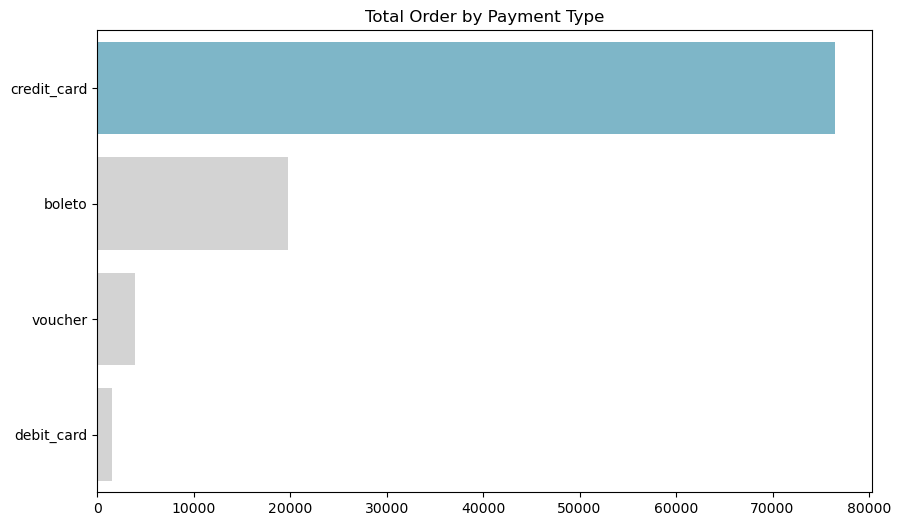

In [59]:
plt.figure(figsize=(10, 6))
total_order_by_payment_type = total_order_by_payment_type.reset_index()

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(data=total_order_by_payment_type, x="total_order", y="payment_type", hue="payment_type", palette=colors_)
plt.title("Total Order by Payment Type")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Pertanyaan 2: Berapakah persentase pesanan yang mengalami keterlambatan pengiriman?

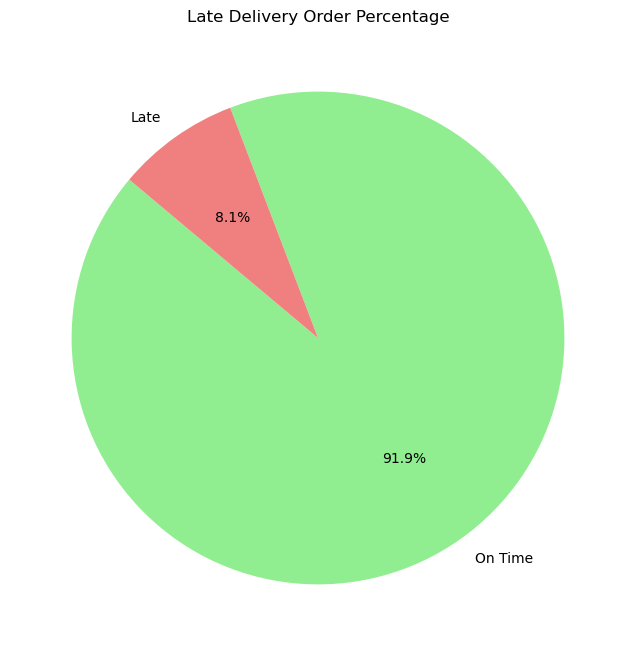

In [60]:
plt.figure(figsize=(8, 8))
labels = ["On Time", "Late"]
colors = ["lightgreen", "lightcoral"]
plt.pie([1-late_delivery_order_percentage/100, late_delivery_order_percentage/100], labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
plt.title("Late Delivery Order Percentage")
plt.show()

### Pertanyaan 3: Berapa jumlah total pendapatan yang dihasilkan dari penjualan produk pada kategori tertentu? dan Kategori produk apa yang memiliki total pendapatan terbanyak?

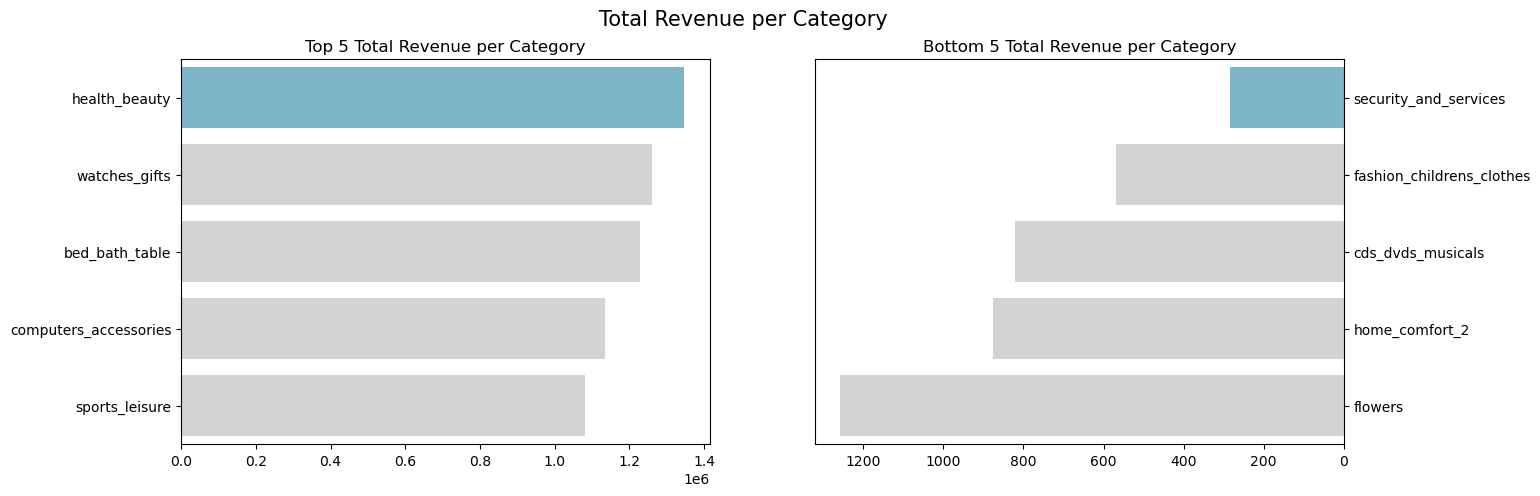

In [61]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
total_revenue_per_category = total_revenue_per_category.reset_index()

fix, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x="total_revenue",
            y="product_category_name", hue="product_category_name", data=total_revenue_per_category.head(5), palette=colors_, ax=ax[0])
ax[0].set_title("Top 5 Total Revenue per Category")
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis="y", labelsize=10)

sns.barplot(x="total_revenue",
            y="product_category_name", hue="product_category_name", data=total_revenue_per_category.sort_values(
                by="total_revenue", ascending=True).head(5), palette=colors_, ax=ax[1])
ax[1].set_title("Bottom 5 Total Revenue per Category")
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis="y", labelsize=10)

plt.suptitle("Total Revenue per Category", fontsize=15)
plt.show()

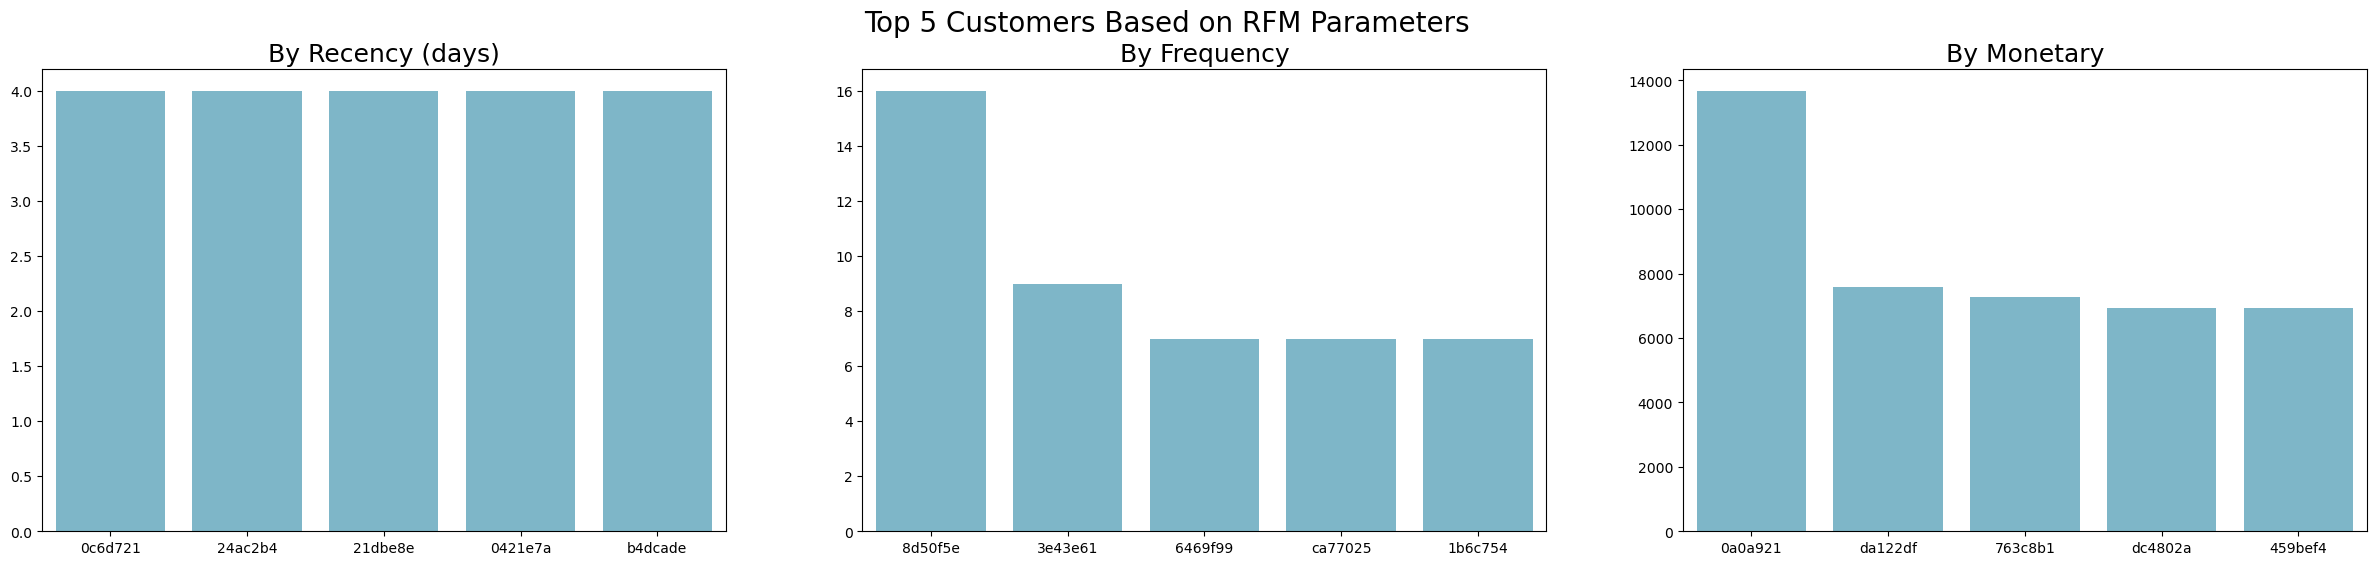

In [62]:
# visualisasi data setiap 5 customer berdasarkan RFM parameters
fig, ax = plt.subplots(1, 3, figsize=(30, 6))
colors_ = ["#72BCD4"] * 5


# Recency
sns.barplot(y="recency", x="customer_unique_id", hue="customer_unique_id", data=orders_customers_df.sort_values(
    by="recency", ascending=True).head(5), palette=colors_, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis="x", labelsize=10)

# Frequency
sns.barplot(y="frequency", x="customer_unique_id", hue="customer_unique_id", data=orders_customers_df.sort_values(
    by="frequency", ascending=False).head(5), palette=colors_, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis="x", labelsize=10)

# Monetary
sns.barplot(y="monetary", x="customer_unique_id", hue="customer_unique_id", data=orders_customers_df.sort_values(
    by="monetary", ascending=False).head(5), palette=colors_, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis="x", labelsize=10)

plt.suptitle("Top 5 Customers Based on RFM Parameters", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1: metode pembayaran paling banyak digunakan oleh customer ketika melakukan order adalah **"credit_card"** dengan jumlah total order sebanyak **"76505"**
- Conclution pertanyaan 2: presentase pesanan yang mengalami keterlambatan pengiriman adalah sebesar **"8.1%"**
- Conclution pertanyaan 3: kategori produk yang memiliki total pendapatan terbanyak adalah **"health_beauty"** dengan total pendapatan sebesar **"1347468.49"**

# Save cleaned data to csv

In [63]:
# save total_order_by_payment_type
total_order_by_payment_type.to_csv("dashboard/total_order_by_payment_type.csv", index=False)
# save orders_df
orders_df.to_csv("dashboard/orders.csv", index=False)
# save total_revenue_per_category
total_revenue_per_category.to_csv(
    "dashboard/total_revenue_per_category.csv", index=False)
# save orders_customers_df
orders_customers_df.to_csv("dashboard/orders_customers.csv", index=False)

print("Data telah disimpan dalam folder 'dashboard'")

Data telah disimpan dalam folder 'dashboard'
